In [257]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.features import PCA as ybPCA
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [258]:
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [259]:
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']
vars_total = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [260]:
scaler = StandardScaler()
scaler.fit(country)
country_scaled = pd.DataFrame(scaler.transform(country), columns=country.columns, index=country.index)

In [261]:
pca_1 = PCA(n_components=None)
pca_1.fit(country_scaled)

PCA()

In [262]:
pca_1.explained_variance_

array([4.15588322, 1.56675593, 1.18219413, 0.99872013, 0.65759254,
       0.22241065, 0.11597805, 0.08762751, 0.06738331])

Text(0.5, 1.0, 'Scree Plot')

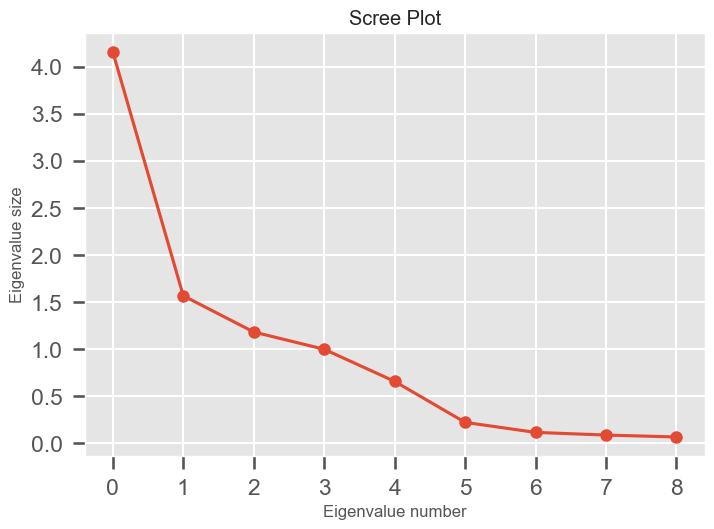

In [263]:
plt.style.use("ggplot") 
plt.plot(pca_1.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [264]:
pca = PCA(n_components=2)
pca.fit(country_scaled)
country_pca = pd.DataFrame(pca.transform(country_scaled), columns=(["col_1", "col_2"]))
# data = pca.fit_transform(country_scaled)
# country_pca = pd.DataFrame(data)

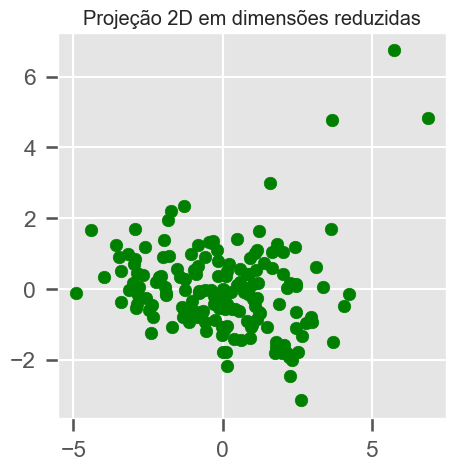

In [265]:
x =country_pca["col_1"]
y =country_pca["col_2"]

plt.figure(figsize = (5,5))
plt.scatter(x,y, c="green", marker="o" )
plt.title("Projeção 2D em dimensões reduzidas")
plt.show()

In [266]:
model_pca = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

model_pca.fit(country_pca)
centroids_pca = model_pca.cluster_centers_
country_pca['clusters'] = model_pca.predict(country_pca)

In [267]:
cluster_0 = len(country_pca[country_pca['clusters'] == 0])
cluster_1 = len(country_pca[country_pca['clusters'] == 1])
cluster_2 = len(country_pca[country_pca['clusters'] == 2])

In [268]:
print(f"""Cluster 0: {cluster_0}
Cluster 1: {cluster_1}
Cluster 2: {cluster_2}""")

Cluster 0: 3
Cluster 1: 92
Cluster 2: 71


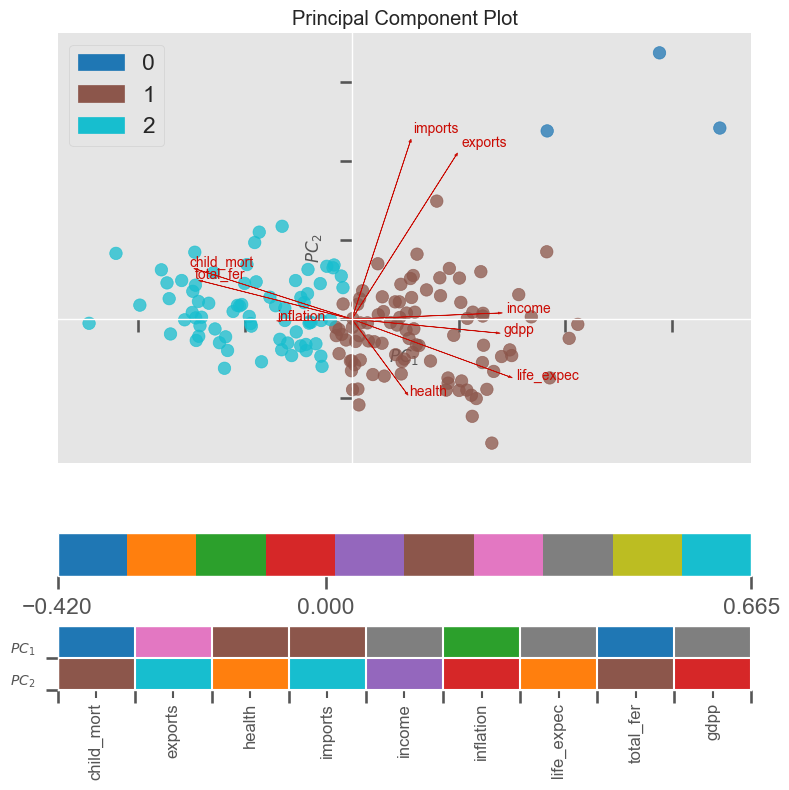

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.grid(False)


visualizer = ybPCA(scale=True, proj_features=True, heatmap=True, colormap="tab10")
visualizer.fit_transform(country, country_pca['clusters'])

_ = visualizer.show()

In [270]:
cluster_0 = country_pca[country_pca['clusters']==0]
cluster_1 = country_pca[country_pca['clusters']==1]
cluster_2 = country_pca[country_pca['clusters']==2]
cluster_0['dist_2'] = (cluster_0['col_1']-centroids_pca[0,0])**2 + (cluster_0['col_2']-centroids_pca[0,1])**2
cluster_1['dist_2'] = (cluster_1['col_1']-centroids_pca[0,0])**2 + (cluster_1['col_2']-centroids_pca[0,1])**2
cluster_2['dist_2'] = (cluster_2['col_1']-centroids_pca[0,0])**2 + (cluster_2['col_2']-centroids_pca[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [271]:
print(f"""Os 3 países que representam os cluster nos dados com PCA são:
Cluster 0: {country.iloc[index_min_0[0]]}
Cluster 1: {country.iloc[index_min_1[0]]}
Cluster 2: {country.iloc[index_min_2[0]]}""")

Os 3 países que representam os cluster nos dados com PCA são:
Cluster 0: child_mort        2.800
exports         200.000
health            3.960
imports         174.000
income        72100.000
inflation        -0.046
life_expec       82.700
total_fer         1.150
gdpp          46600.000
Name: Singapore, dtype: float64
Cluster 1: child_mort        4.20
exports         103.00
health            9.19
imports          86.50
income        45700.00
inflation        -3.22
life_expec       80.40
total_fer         2.05
gdpp          48700.00
Name: Ireland, dtype: float64
Cluster 2: child_mort      37.60
exports         51.40
health           5.38
imports         79.10
income        5840.00
inflation        5.73
life_expec      65.50
total_fer        2.65
gdpp          3040.00
Name: Guyana, dtype: float64


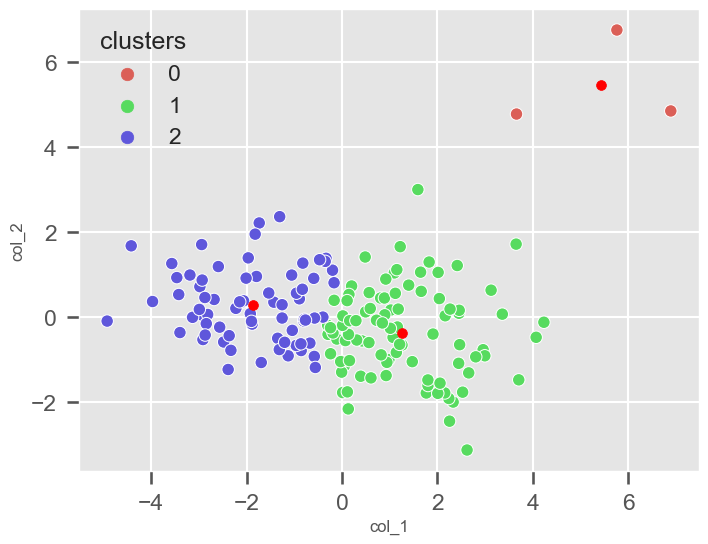

In [272]:
plt.figure(figsize = (8,6))
sns.scatterplot(data =country_pca, x='col_1',y='col_2', hue=country_pca['clusters'],palette=sns.color_palette('hls', 3))

plt.scatter(centroids_pca[:,0], centroids_pca[:,1] , c= 'red', s=50)
plt.show()

_____________________

In [273]:
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo_pca = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country_pca)
    count = model_aglo_pca.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

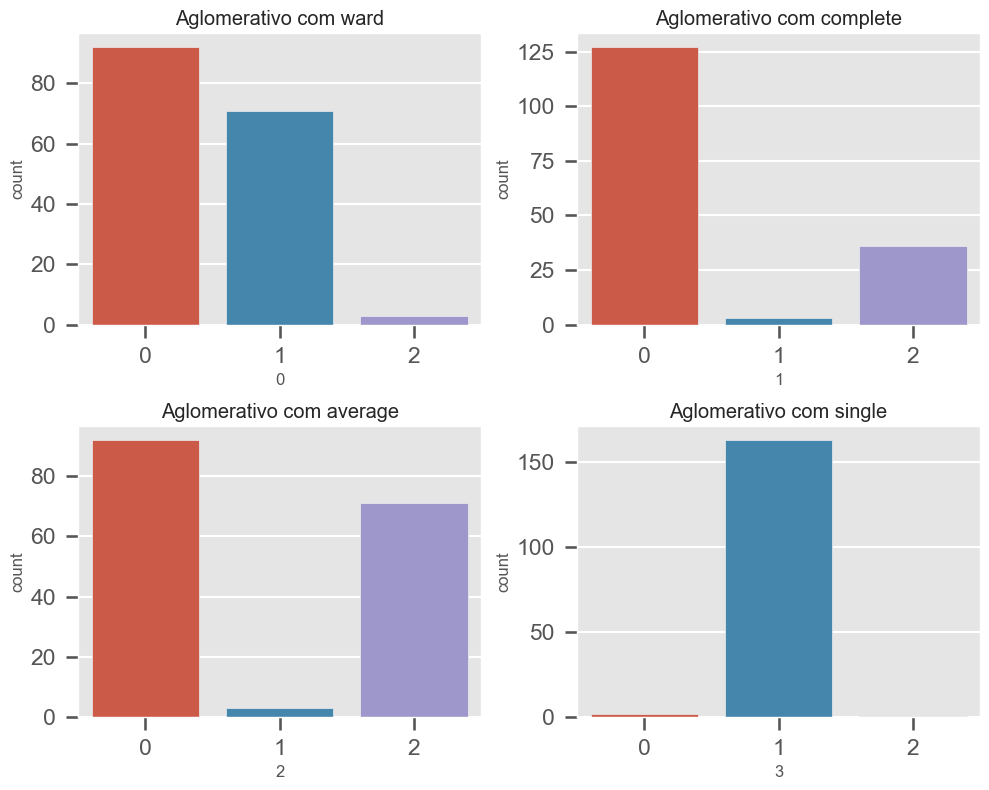

In [274]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Distancias')

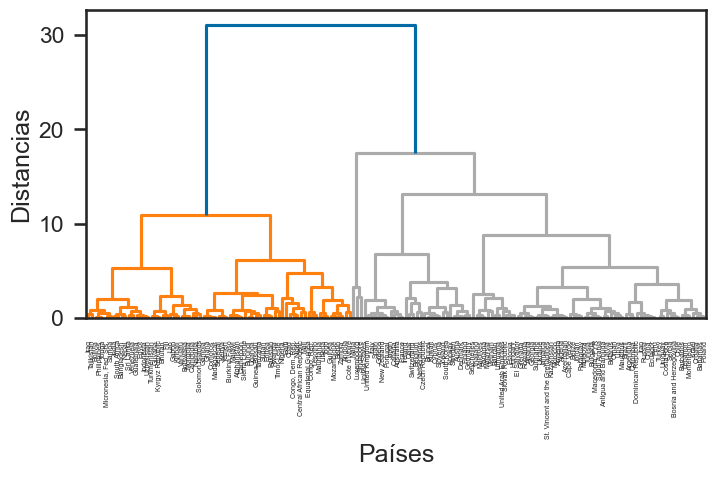

In [275]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(country_pca, method="ward")
dendrogram = sch.dendrogram(linkage, labels=country_scaled.index, leaf_rotation=90)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

______________

In [276]:
model_medoid_pca = KMedoids(n_clusters=3, max_iter=1000, random_state=42)

model_medoid_pca.fit(country_pca)
medoids = model_medoid_pca.cluster_centers_
country_pca['clusters_medoid'] = model_medoid_pca.predict(country_pca)

In [277]:
cluster_0 = len(country_pca[country_pca['clusters_medoid'] == 0])
cluster_1 = len(country_pca[country_pca['clusters_medoid'] == 1])
cluster_2 = len(country_pca[country_pca['clusters_medoid'] == 2])

In [278]:
print(f"""Cluster 0: {cluster_0}
Cluster 1: {cluster_1}
Cluster 2: {cluster_2}""")

Cluster 0: 48
Cluster 1: 58
Cluster 2: 60


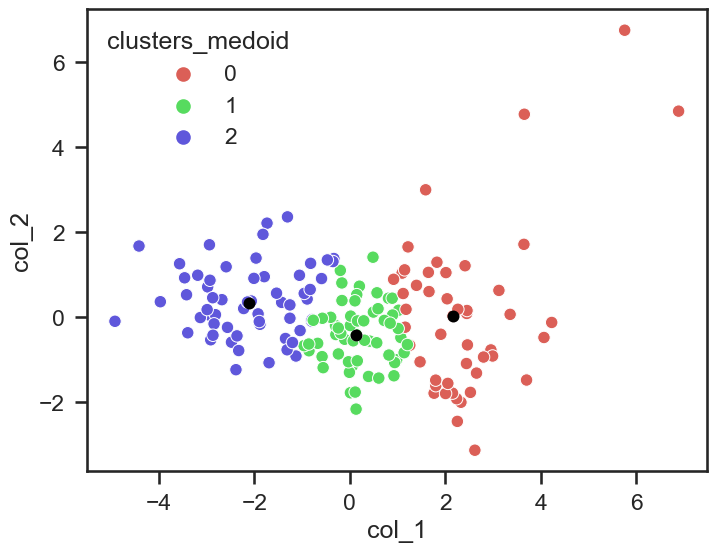

In [279]:
plt.figure(figsize = (8,6))
sns.scatterplot(data= country_pca, x='col_1',y='col_2', hue= country_pca['clusters_medoid'], palette= sns.color_palette('hls', 3))

plt.scatter(medoids[:,0], medoids[:,1] , c= 'black', s=50)
plt.show()

In [280]:
cluster_0 = country_pca[country_pca['clusters_medoid']==0]
cluster_1 = country_pca[country_pca['clusters_medoid']==1]
cluster_2 = country_pca[country_pca['clusters_medoid']==2]
cluster_0['dist_2'] = (cluster_0['col_1']-medoids[0,0])**2 + (cluster_0['col_2']-medoids[0,1])**2
cluster_1['dist_2'] = (cluster_1['col_1']-medoids[0,0])**2 + (cluster_1['col_2']-medoids[0,1])**2
cluster_2['dist_2'] = (cluster_2['col_1']-medoids[0,0])**2 + (cluster_2['col_2']-medoids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [281]:
print(f"""Os 3 países que representam os cluster nos dados com PCA usando Medoids são:
Cluster 0: {country.iloc[index_min_0[0]]}
Cluster 1: {country.iloc[index_min_1[0]]}
Cluster 2: {country.iloc[index_min_2[0]]}""")

Os 3 países que representam os cluster nos dados com PCA usando Medoids são:
Cluster 0: child_mort        3.60
exports          50.20
health            5.97
imports          57.50
income        33900.00
inflation         2.01
life_expec       79.90
total_fer         1.42
gdpp          30800.00
Name: Cyprus, dtype: float64
Cluster 1: child_mort       10.30
exports          45.50
health            6.03
imports          58.90
income        19100.00
inflation         1.44
life_expec       76.80
total_fer         2.13
gdpp          12200.00
Name: Antigua and Barbuda, dtype: float64
Cluster 2: child_mort      29.60
exports         51.60
health           6.18
imports         81.70
income        2790.00
inflation       10.00
life_expec      68.50
total_fer        3.10
gdpp           880.00
Name: Kyrgyz Republic, dtype: float64
